# Pierrick — Immo Eliza Cleaning Notebook
**Goal:** Clean the raw data individually → share cleaned version at 16:00  
**Output:** `data/cleaned/immo_eliza_cleaned_pierrick.parquet`  
**Date:** 2025-11-12


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

RAW_PATH   = "../../data/raw/immo_eliza_raw.csv"  
CLEAN_PATH = "../../data/cleaned/immo_eliza_cleaned_pierrick.parquet"

print("RAW:", RAW_PATH)
print("CLEAN:", CLEAN_PATH)


RAW: ../../data/raw/immo_eliza_raw.csv
CLEAN: ../../data/cleaned/immo_eliza_cleaned_pierrick.parquet


In [53]:
df = pd.read_csv(RAW_PATH)
print("Raw shape:", df.shape)
df.head()

Raw shape: (16309, 26)


,url,Property ID,Price,State of the property,Availability,Number of bedrooms,Livable surface,Furnished,Attic,Garage,...,Type of heating,Type of glazing,Elevator,Number of facades,Garden,Surface garden,Terrace,Surface terrace,Total land surface,Swimming pool
0,https://immovlan.be/en/detail/studio/for-sale/...,vbd20021,175 000 €,New,On contract,0.00,51 m²,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,No,NaN,NaN,NaN
1,https://immovlan.be/en/detail/apartment/for-sa...,vbd30235,415 000 €,New,On contract,1.00,70 m²,No,NaN,Yes,...,NaN,NaN,Yes,2.00,Yes,NaN,Yes,20 m²,NaN,Yes
2,https://immovlan.be/en/detail/residence/for-sa...,vbd46297,399 000 €,NaN,NaN,2.00,129 m²,NaN,NaN,Yes,...,Gas,Double glass,NaN,4.00,Yes,NaN,NaN,NaN,NaN,NaN
3,https://immovlan.be/en/detail/apartment/for-sa...,vbd36813,229 000 €,New,NaN,2.00,82 m²,NaN,NaN,NaN,...,NaN,NaN,Yes,3.00,No,NaN,Yes,8 m²,NaN,NaN
4,https://immovlan.be/en/detail/apartment/for-sa...,vbb60643,320 000 €,New,NaN,3.00,106 m²,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,NaN,Yes,6 m²,NaN,NaN


In [46]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16309 entries, 0 to 16308
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    16309 non-null  object 
 1   Property ID            16309 non-null  object 
 2   Price                  15725 non-null  object 
 3   State of the property  11846 non-null  object 
 4   Availability           7001 non-null   object 
 5   Number of bedrooms     14083 non-null  float64
 6   Livable surface        13294 non-null  object 
 7   Furnished              8383 non-null   object 
 8   Attic                  3661 non-null   object 
 9   Garage                 7044 non-null   object 
 10  Number of garages      3799 non-null   float64
 11  Kitchen equipment      4380 non-null   object 
 12  Kitchen type           2181 non-null   object 
 13  Number of bathrooms    12042 non-null  float64
 14  Number of showers      3538 non-null   float64
 15  Nu

,url,Property ID,Price,State of the property,Availability,Number of bedrooms,Livable surface,Furnished,Attic,Garage,...,Type of heating,Type of glazing,Elevator,Number of facades,Garden,Surface garden,Terrace,Surface terrace,Total land surface,Swimming pool
0,https://immovlan.be/en/detail/studio/for-sale/...,vbd20021,175 000 €,New,On contract,0.00,51 m²,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,No,NaN,NaN,NaN
1,https://immovlan.be/en/detail/apartment/for-sa...,vbd30235,415 000 €,New,On contract,1.00,70 m²,No,NaN,Yes,...,NaN,NaN,Yes,2.00,Yes,NaN,Yes,20 m²,NaN,Yes
2,https://immovlan.be/en/detail/residence/for-sa...,vbd46297,399 000 €,NaN,NaN,2.00,129 m²,NaN,NaN,Yes,...,Gas,Double glass,NaN,4.00,Yes,NaN,NaN,NaN,NaN,NaN
3,https://immovlan.be/en/detail/apartment/for-sa...,vbd36813,229 000 €,New,NaN,2.00,82 m²,NaN,NaN,NaN,...,NaN,NaN,Yes,3.00,No,NaN,Yes,8 m²,NaN,NaN
4,https://immovlan.be/en/detail/apartment/for-sa...,vbb60643,320 000 €,New,NaN,3.00,106 m²,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,NaN,Yes,6 m²,NaN,NaN


In [47]:
# Cleaning script for immo_eliza_raw.csv


import re
import numpy as np
import pandas as pd

# 1. Normalize column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r"\s+", "_", regex=True)
      .str.replace(r"[^a-z0-9_]", "", regex=True)
)

# 2. Drop columns with too many missing values (> 80%)
drop_cols = [
    "kitchen_type",
    "surface_garden",
    "number_of_showers",
    "attic",
    "number_of_garages",
    "swimming_pool",
    "kitchen_equipment"
]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# 3. Convert text-based numeric columns to floats
def extract_num(val):
    if pd.isna(val):
        return np.nan
    val = re.sub(r"[^0-9.,]", "", str(val))
    val = val.replace(",", ".")
    try:
        return float(val)
    except ValueError:
        return np.nan

df["price"] = df["price"].apply(extract_num)
df["livable_surface"] = df["livable_surface"].apply(extract_num)
df["surface_terrace"] = df["surface_terrace"].apply(extract_num)
df["total_land_surface"] = df["total_land_surface"].apply(extract_num)

# 4. Fill missing values
num_cols = df.select_dtypes(include="number").columns
obj_cols = df.select_dtypes(include="object").columns

for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in obj_cols:
    df[c] = df[c].fillna("Unknown")

# 5. Remove invalid or impossible rows
df = df[df["price"] > 0]
df = df[df["livable_surface"] > 0]

# 6. Add calculated features
df["price_per_m2"] = df["price"] / df["livable_surface"]

# Derive region based on URL text
def get_region(url):
    if pd.isna(url):
        return "Unknown"
    url = url.lower()
    if "/brussels/" in url or "bruxelles" in url:
        return "Brussels"
    if any(x in url for x in [
        "antwerp", "gent", "brugge", "kortrijk", "hasselt", 
        "mechelen", "leuven", "flanders"
    ]):
        return "Flanders"
    if any(x in url for x in [
        "liege", "namur", "charleroi", "mons", "louvainla", 
        "ar", "luxembourg", "wallonia"
    ]):
        return "Wallonia"
    return "Unknown"

df["region"] = df["url"].apply(get_region)

# 7. Check basic stats
print("Cleaned shape:", df.shape)
print("Top missing values (%):")
print((df.isna().mean() * 100).round(1).sort_values(ascending=False).head(10))

# 8. Save cleaned dataset
CLEAN_PATH = "../../data/cleaned/immo_eliza_cleaned_pierrick.parquet"
df.to_parquet(CLEAN_PATH, index=False)
print("Saved cleaned dataset:", CLEAN_PATH)


Cleaned shape: (16309, 21)
Top missing values (%):
url                  0.00
type_of_heating      0.00
price_per_m2         0.00
total_land_surface   0.00
surface_terrace      0.00
terrace              0.00
garden               0.00
number_of_facades    0.00
elevator             0.00
type_of_glazing      0.00
dtype: float64
Saved cleaned dataset: ../../data/cleaned/immo_eliza_cleaned_pierrick.parquet


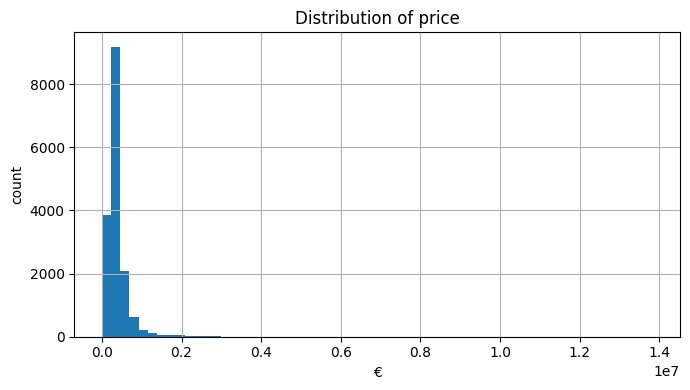

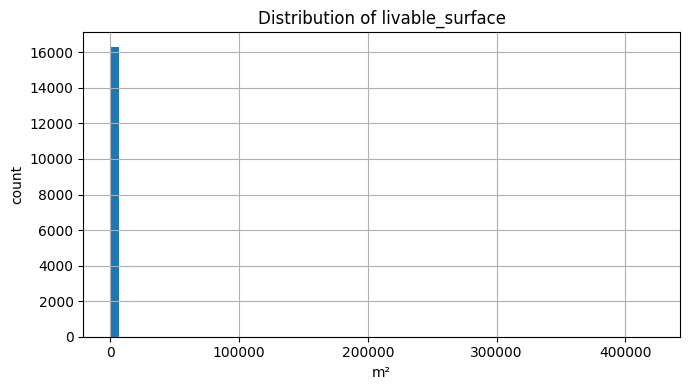

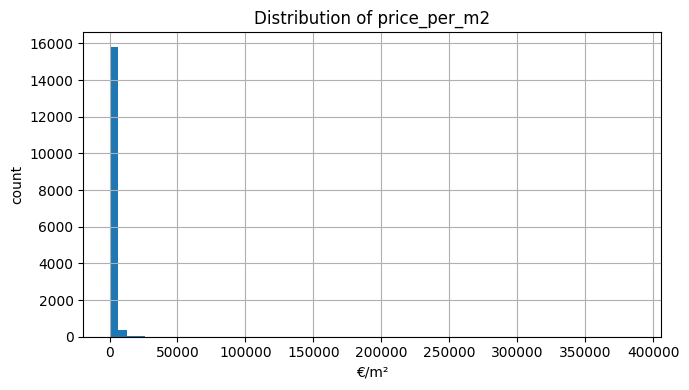

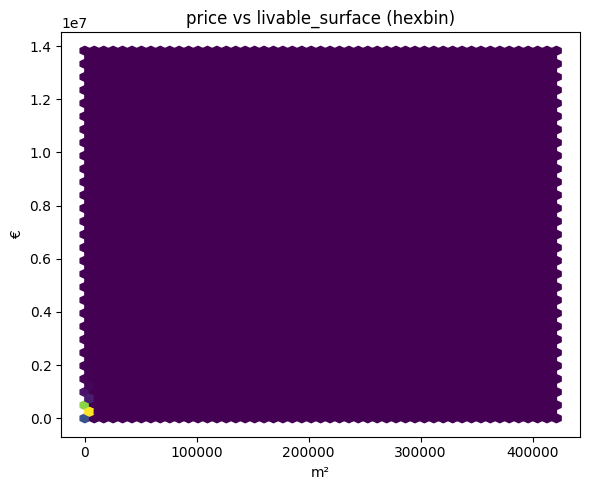

<Figure size 700x400 with 0 Axes>

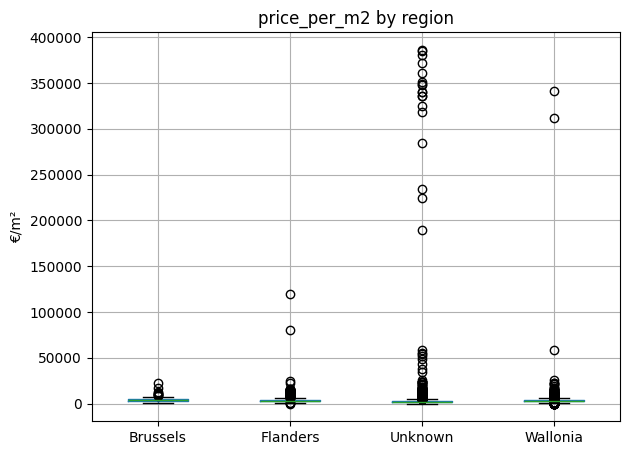

In [48]:
# Basic visuals (quick sanity checks)
import matplotlib.pyplot as plt

# 1) Distributions (price, livable_surface, price_per_m2)
if "price" in df.columns:
    plt.figure(figsize=(7,4))
    df["price"].dropna().hist(bins=60)
    plt.title("Distribution of price")
    plt.xlabel("€"); plt.ylabel("count")
    plt.tight_layout()
    plt.show()

if "livable_surface" in df.columns:
    plt.figure(figsize=(7,4))
    df["livable_surface"].dropna().hist(bins=60)
    plt.title("Distribution of livable_surface")
    plt.xlabel("m²"); plt.ylabel("count")
    plt.tight_layout()
    plt.show()

if "price_per_m2" in df.columns:
    plt.figure(figsize=(7,4))
    df["price_per_m2"].dropna().hist(bins=60)
    plt.title("Distribution of price_per_m2")
    plt.xlabel("€/m²"); plt.ylabel("count")
    plt.tight_layout()
    plt.show()

# 2) Relationship checks
if {"price", "livable_surface"}.issubset(df.columns):
    plt.figure(figsize=(6,5))
    plt.hexbin(df["livable_surface"], df["price"], gridsize=50)
    plt.title("price vs livable_surface (hexbin)")
    plt.xlabel("m²"); plt.ylabel("€")
    plt.tight_layout()
    plt.show()

# 3) Group comparison (region)
if {"region","price_per_m2"}.issubset(df.columns):
    plt.figure(figsize=(7,4))
    df.boxplot(column="price_per_m2", by="region")
    plt.title("price_per_m2 by region"); plt.suptitle("")
    plt.xlabel(""); plt.ylabel("€/m²")
    plt.tight_layout()
    plt.show()

# 4) Top 10 municipalities by median €/m² (if municipality exists)
if {"municipality","price_per_m2"}.issubset(df.columns):
    top_med = (df[["municipality","price_per_m2"]]
                 .dropna()
                 .groupby("municipality")["price_per_m2"]
                 .median()
                 .sort_values(ascending=False)
                 .head(10))
    plt.figure(figsize=(8,4))
    top_med[::-1].plot(kind="barh")  # reverse for readable order
    plt.title("Top 10 municipalities by median €/m²")
    plt.xlabel("€/m²"); plt.ylabel("municipality")
    plt.tight_layout()
    plt.show()


In [49]:
# Quick summary stats for stand-up 

total_rows = len(df)
total_cols = len(df.columns)
median_price = round(df["price"].median(), 2) if "price" in df.columns else None
median_ppm2 = round(df["price_per_m2"].median(), 2) if "price_per_m2" in df.columns else None
outliers = int(df["is_outlier_ppm2"].sum()) if "is_outlier_ppm2" in df.columns else 0

print("Dataset summary")
print(f"Rows after cleaning: {total_rows:,}")
print(f"Columns: {total_cols}")
print(f"Median price: €{median_price:,.0f}")
print(f"Median price per m²: €{median_ppm2:,.0f}")
print(f"Marked outliers (price_per_m2): {outliers}")
print(f"Saved cleaned file: {CLEAN_PATH}")


Dataset summary
Rows after cleaning: 16,309
Columns: 21
Median price: €319,000
Median price per m²: €2,852
Marked outliers (price_per_m2): 0
Saved cleaned file: ../../data/cleaned/immo_eliza_cleaned_pierrick.parquet


In [50]:
# Final validation: dataset ready for analysis

print("Null values remaining per column (should all be 0 or very low):")
print(df.isna().sum().sort_values(ascending=False).head(10))

print("\nData types overview:")
print(df.dtypes.head(15))

if "price_per_m2" in df.columns:
    print("\nPrice per m² sanity range:")
    print(df["price_per_m2"].describe(percentiles=[0.01, 0.5, 0.99]))

# Check basic logical consistency
if "price" in df.columns and "livable_surface" in df.columns:
    inconsistent = df[(df["price"] < 10000) | (df["livable_surface"] < 10)]
    print(f"\nSuspicious rows (too low values): {len(inconsistent)}")

print("\nDataset validated — ready for analysis.")


Null values remaining per column (should all be 0 or very low):
url                   0
type_of_heating       0
price_per_m2          0
total_land_surface    0
surface_terrace       0
terrace               0
garden                0
number_of_facades     0
elevator              0
type_of_glazing       0
dtype: int64

Data types overview:
url                       object
property_id               object
price                    float64
state_of_the_property     object
availability              object
number_of_bedrooms       float64
livable_surface          float64
furnished                 object
garage                    object
number_of_bathrooms      float64
number_of_toilets        float64
type_of_heating           object
type_of_glazing           object
elevator                  object
number_of_facades        float64
dtype: object

Price per m² sanity range:
count    16,309.00
mean      3,404.06
std      11,681.62
min           0.01
1%          280.76
50%       2,851.65
99%      1

Shape: (16309, 21)

Numeric columns: ['price', 'number_of_bedrooms', 'livable_surface', 'number_of_bathrooms', 'number_of_toilets', 'number_of_facades', 'surface_terrace', 'total_land_surface', 'price_per_m2']

Categorical columns: ['url', 'property_id', 'state_of_the_property', 'availability', 'furnished', 'garage', 'type_of_heating', 'type_of_glazing', 'elevator', 'garden', 'terrace', 'region']


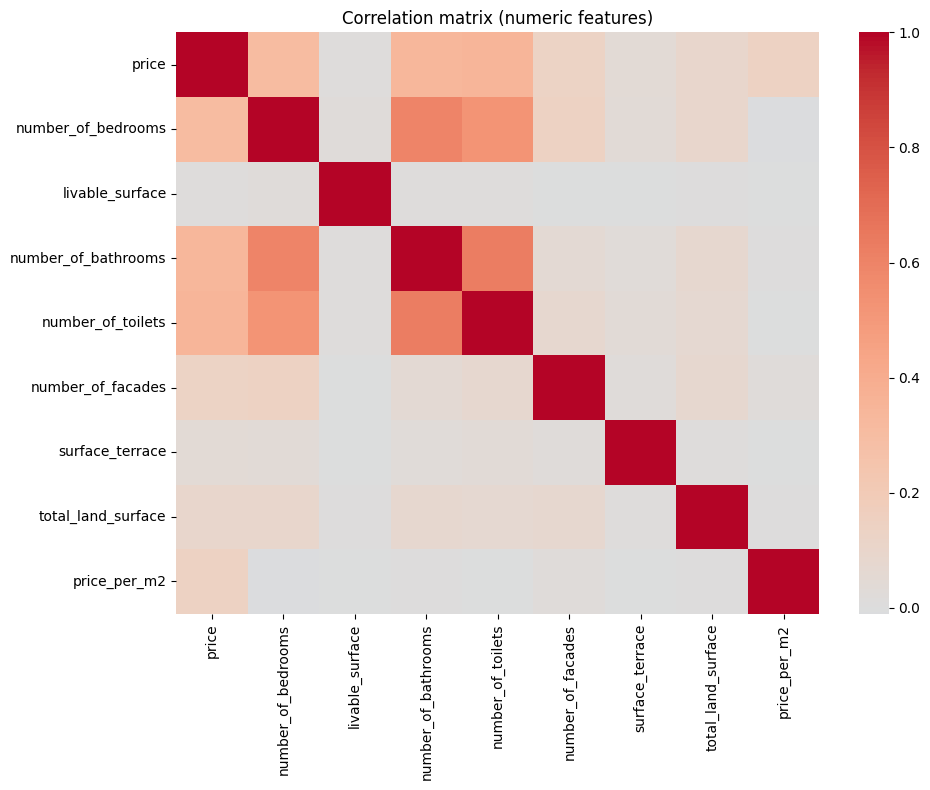

Correlation with price:


price                 1.00
number_of_toilets     0.35
number_of_bathrooms   0.34
number_of_bedrooms    0.31
price_per_m2          0.14
number_of_facades     0.13
total_land_surface    0.09
surface_terrace       0.05
livable_surface       0.01
Name: price, dtype: float64

price                 1.00
number_of_toilets     0.35
number_of_bathrooms   0.34
number_of_bedrooms    0.31
price_per_m2          0.14
number_of_facades     0.13
total_land_surface    0.09
surface_terrace       0.05
livable_surface       0.01
Name: price, dtype: float64

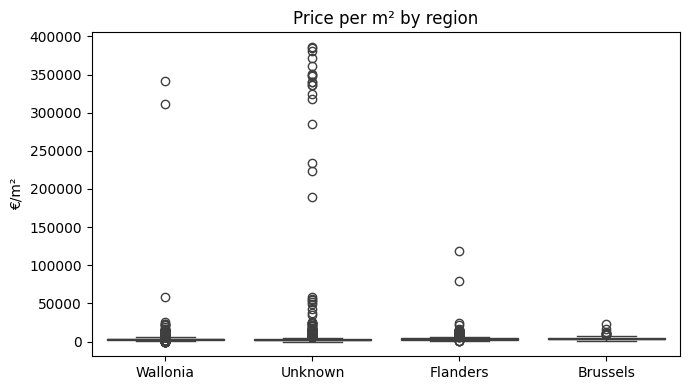

In [ ]:
# Data Analysis 


import seaborn as sns

# 1. basic info
print("Shape:", df.shape)
print("\nNumeric columns:", df.select_dtypes(include='number').columns.tolist())
print("\nCategorical columns:", df.select_dtypes(exclude='number').columns.tolist())

# 2. correlation matrix for numeric features
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation matrix (numeric features)")
plt.tight_layout()
plt.show()

# 3. correlation with price
if "price" in df.columns:
    corr_price = corr["price"].sort_values(ascending=False)
    print("Correlation with price:")
    display(corr_price.head(10))
    display(corr_price.tail(10))

# 4. price vs region
if {"region","price_per_m2"}.issubset(df.columns):
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x="region", y="price_per_m2")
    plt.title("Price per m² by region")
    plt.xlabel(""); plt.ylabel("€/m²")
    plt.tight_layout()
    plt.show()

# 5. top 10 municipalities by median price per m²
if {"municipality","price_per_m2"}.issubset(df.columns):
    top10 = (df.groupby("municipality")["price_per_m2"]
               .median()
               .sort_values(ascending=False)
               .head(10))
    plt.figure(figsize=(8,4))
    sns.barplot(x=top10.values, y=top10.index, orient="h")
    plt.title("Top 10 municipalities by median €/m²")
    plt.xlabel("€/m²"); plt.ylabel("")
    plt.tight_layout()
    plt.show()

# 6. distribution of price_per_m2 by property type
if {"type_of_property","price_per_m2"}.issubset(df.columns):
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x="type_of_property", y="price_per_m2")
    plt.title("Price per m² by property type")
    plt.xlabel(""); plt.ylabel("€/m²")
    plt.tight_layout()
    plt.show()


### V2

In [ ]:
# V2 Cleaning: combination of mine & Brigi's analysis to make a simpel clean version
import pandas as pd
import numpy as np
import re

# Remove duplicates (should be no dups, but extra check)
df = df.drop_duplicates()


# Strip whitespace on all text columns
obj_cols =df.select_dtypes(include="object").columns
df[obj_cols] = df[obj_cols].apply(lambda col: col.str.strip())

# Fix encoding where needed (latin1 -> utf-8 if broken)
def fix_encoding(text):
    if isinstance(text, str):
        try:
            return text.encode("latin1").decode("utf-8")
        except:
            return text
    return text

df[obj_cols] = df[obj_cols].apply(lambda col: col.map(fix_encoding))

# Convert yes/no to 0/1
yes_no_cols = ["Furnished", "Attic", "Garage", "Elevator", "Garden", "Terrace", "Swimming pool"]
for c in yes_no_cols:
    if c in df.columns:
        df[c] = (
            df[c]
            .astype(str)
            .str.strip()
            .str.lower()
            .map({"yes": 1, "no": 0})
        )

# Clean price column -> float
def clean_price(x):
    x = str(x)
    x = re.sub(r"[^\d,.-]", "", x)
    # European comma -> dot if only one comma and no dot
    if "," in x and "." not in x and x.count(",") == 1:
        x = x.replace(",", ".")
    x = x.replace(",", "")  # thousands separators
    try:
        return float(x)
    except:
        return np.nan

if "Price" in df.columns:
    df["Price"] = df["Price"].apply(clean_price)

# Clean area columns
area_cols = ["Livable surface", "Surface garden", "Surface terrace", "Total land surface"]
for c in area_cols:
    if c in df.columns:
        df[c] = (
            df[c]
            .astype(str)
            .str.replace("m²", "", regex=False)
            .str.replace("m2", "", regex=False)
            .str.strip()
        )
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Remove listings without a price
df = df.dropna(subset=["Price"])

# Test
print("Clean shape:", df.shape)
df.head(5)


Clean shape: (15725, 26)


,url,Property ID,Price,State of the property,Availability,Number of bedrooms,Livable surface,Furnished,Attic,Garage,...,Type of heating,Type of glazing,Elevator,Number of facades,Garden,Surface garden,Terrace,Surface terrace,Total land surface,Swimming pool
0,https://immovlan.be/en/detail/studio/for-sale/...,vbd20021,"175,000.00",New,On contract,0.00,51.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN
1,https://immovlan.be/en/detail/apartment/for-sa...,vbd30235,"415,000.00",New,On contract,1.00,70.00,0.00,NaN,1.00,...,NaN,NaN,1.00,2.00,1.00,NaN,1.00,20.00,NaN,1.00
2,https://immovlan.be/en/detail/residence/for-sa...,vbd46297,"399,000.00",NaN,NaN,2.00,129.00,NaN,NaN,1.00,...,Gas,Double glass,NaN,4.00,1.00,NaN,NaN,NaN,NaN,NaN
3,https://immovlan.be/en/detail/apartment/for-sa...,vbd36813,"229,000.00",New,NaN,2.00,82.00,NaN,NaN,NaN,...,NaN,NaN,1.00,3.00,0.00,NaN,1.00,8.00,NaN,NaN
4,https://immovlan.be/en/detail/apartment/for-sa...,vbb60643,"320,000.00",New,NaN,3.00,106.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.00,NaN,1.00,6.00,NaN,NaN


In [ ]:
# Extract 'postcode' and 'city' from URL

def extract_city_postcode(url):
    """
    Matches URLs like:
    .../2000/antwerpen/...
    or 
    .../8500/kortrijk/... etc.
    """
    url = str(url)
    m = re.search(r"/(\d{4})/([^/]+)/", url)
    if not m:
        return pd.Series([np.nan, np.nan])
    
    postcode = m.group(1)
    raw_city = m.group(2).replace("-", " ")
    city = raw_city.title()  # simple capitalization
    
    return pd.Series([postcode, city])

df[["postcode", "city"]] = df["url"].apply(extract_city_postcode)
df["postcode"] = pd.to_numeric(df["postcode"], errors="coerce")

# Test
print("Postcode coverage:", (df["postcode"].notna().mean()*100).round(1), "%")
df[["url", "postcode", "city"]].head(5)


Postcode coverage: 100.0 %


,url,postcode,city
0,https://immovlan.be/en/detail/studio/for-sale/...,4000,Liege
1,https://immovlan.be/en/detail/apartment/for-sa...,1410,Waterloo
2,https://immovlan.be/en/detail/residence/for-sa...,1501,Buizingen
3,https://immovlan.be/en/detail/apartment/for-sa...,7000,Mons
4,https://immovlan.be/en/detail/apartment/for-sa...,7000,Mons


In [ ]:
# Postcode Province and Region mapping

def postcode_to_province(pc):
    """Maps Belgian postal codes to provinces."""
    if pd.isna(pc):
        return "Unknown"

    pc = int(pc)

    # Brussels Capital Region
    if 1000 <= pc <= 1299:
        return "Brussels"

    # Walloon Brabant
    if 1300 <= pc <= 1499:
        return "Walloon Brabant"

    # Flemish Brabant
    if 1500 <= pc <= 1999 or 3000 <= pc <= 3499:
        return "Flemish Brabant"

    # Antwerp
    if 2000 <= pc <= 2999:
        return "Antwerp"

    # Limburg
    if 3500 <= pc <= 3999:
        return "Limburg"

    # Liège
    if 4000 <= pc <= 4499:
        return "Liège"

    # Namur
    if 4500 <= pc <= 5680:
        return "Namur"

    # Hainaut
    if 5681 <= pc <= 6599 or 7000 <= pc <= 7999:
        return "Hainaut"

    # Luxembourg
    if 6600 <= pc <= 6999:
        return "Luxembourg"

    # West Flanders
    if 8000 <= pc <= 8999:
        return "West Flanders"

    # East Flanders
    if 9000 <= pc <= 9999:
        return "East Flanders"

    return "Unknown"


# Apply province mapping
df["Province"] = df["postcode"].apply(postcode_to_province)


# Region logic

def postcode_to_region(pc):
    """Maps postal code to Belgian Region."""
    if pd.isna(pc):
        return "Unknown"
    pc = int(pc)

    # Brussels
    if 1000 <= pc <= 1299:
        return "Brussels"

    # Wallonia
    if 1300 <= pc <= 1499:
        return "Wallonia"
    if 4000 <= pc <= 7999:
        return "Wallonia"

    # Flanders
    if 1500 <= pc <= 3999:
        return "Flanders"
    if 8000 <= pc <= 9999:
        return "Flanders"

    return "Unknown"

df["Region"] = df["postcode"].apply(postcode_to_region)


# Test 
print("Province distribution:")
print(df["Province"].value_counts(dropna=False))

print("\nRegion distribution:")
print(df["Region"].value_counts(dropna=False))


Province distribution:
Province
Namur              2233
Walloon Brabant    1609
Limburg            1451
Hainaut            1443
Brussels           1435
Antwerp            1394
Luxembourg         1313
West Flanders      1269
Flemish Brabant    1239
East Flanders      1222
Liège              1117
Name: count, dtype: int64

Region distribution:
Region
Wallonia    7715
Flanders    6575
Brussels    1435
Name: count, dtype: int64


In [ ]:
# Outlier handling: create winsorized columns analysis 

import numpy as np

# Compute price_per_m2 if not present
if "Livable surface" in df.columns and "Price" in df.columns:
    df["price_per_m2"] = df["Price"] / df["Livable surface"]
else:
    raise RuntimeError("Need 'Price' and 'Livable surface' to compute price_per_m2.")

# Winsorize Price at 1% and 99% percentiles
p_lo, p_hi = df["Price"].quantile([0.01, 0.99])
df["Price_wins"] = df["Price"].clip(lower=p_lo, upper=p_hi)

# Winsorize price_per_m2 at 1% and 99% percentiles
ppm_lo, ppm_hi = df["price_per_m2"].quantile([0.01, 0.99])
df["price_per_m2_wins"] = df["price_per_m2"].clip(lower=ppm_lo, upper=ppm_hi)

print("Price range:", df["Price"].min(), "->", df["Price"].max())
print("Winsorized price range:", df["Price_wins"].min(), "->", df["Price_wins"].max())

print("price_per_m2 range:", df["price_per_m2"].min(), "->", df["price_per_m2"].max())
print("Winsorized price_per_m2 range:", df["price_per_m2_wins"].min(), "->", df["price_per_m2_wins"].max())


Price range: 1.0 → 13827600.0
Winsorized price range: 34810.0 → 1590000.0
price_per_m2 range: 0.008064516129032258 → 386050.0
Winsorized price_per_m2 range: 646.9446883230904 → 7421.160714285698


In [ ]:
# Property type from URL + category + type 

import re

def extract_property_type_from_url(url: str):
    """
    Immovlan-like pattern:
    https://immovlan.be/en/detail/apartment/for-sale/...
                                   ^ type here
    """
    url = str(url)
    path = url.split("immovlan.be")[-1]
    parts = path.strip("/").split("/")
    try:
        idx = parts.index("detail")
        if idx + 1 < len(parts):
            return parts[idx + 1]  # "apartment", "residence", "commercial-building"
    except ValueError:
        pass
    return np.nan

if "url" not in df.columns:
    raise RuntimeError("Column 'url' is required to extract property type from URL.")

# Type from URL
df["property_type_raw"] = df["url"].apply(extract_property_type_from_url)

def clean_type_string(x):
    if not isinstance(x, str):
        x = str(x)
    return x.strip().lower()

df["property_type_clean"] = df["property_type_raw"].apply(clean_type_string)

print("Raw property_type values (top 15):")
print(df["property_type_clean"].value_counts(dropna=False).head(15))

# Map to categories
def map_type_to_category(t: str) -> str:
    # apartments / flats / studios
    if any(w in t for w in ["apartment", "flat", "studio", "duplex", "penthouse", "loft"]):
        return "apartment"
    # houses / residences / villas
    if any(w in t for w in ["house", "residence", "villa", "bungalow"]):
        return "house"
    # commercial / offices / shops / mixed-use
    if any(w in t for w in ["commercial", "office", "shop", "retail", "mixed"]):
        return "commercial_or_mixed"
    # parking / garages
    if any(w in t for w in ["garage", "parking"]):
        return "parking"
    # land / plots
    if any(w in t for w in ["land", "plot"]):
        return "land"
    # missing / unknown
    if t in ["nan", "", "none", "unknown"]:
        return "unknown"
    # fallback
    return "other"

df["property_category"] = df["property_type_clean"].apply(map_type_to_category)

print("\nProperty category distribution:")
print(df["property_category"].value_counts(dropna=False))

# Type-specific cleaning rules
def has(col):
    return col in df.columns

# Columns we might want to adjust
bed_col = "Number of bedrooms"
bath_col = "Number of bathrooms"
toilet_col = "Number of toilets"
surf_col = "Livable surface"
garden_col = "Garden"
pool_col = "Swimming pool"

# Parking / garage: no bedrooms/bathrooms needed
mask_parking = df["property_category"] == "parking"

if has(bed_col):
    df.loc[mask_parking, bed_col] = 0
if has(bath_col):
    df.loc[mask_parking, bath_col] = 0
if has(toilet_col):
    df.loc[mask_parking, toilet_col] = 0
if has(surf_col):
    # often very small or irrelevant for parking, keep as-is or set to NaN
    pass

# Apartments: usually no garden/pool -> if missing, set to 0
mask_apartment = df["property_category"] == "apartment"

if has(garden_col):
    df.loc[mask_apartment & df[garden_col].isna(), garden_col] = 0
if has(pool_col):
    df.loc[mask_apartment & df[pool_col].isna(), pool_col] = 0

# Houses: if large livable surface but bedrooms missing, assume at least 1
mask_house = df["property_category"] == "house"

if has(bed_col) and has(surf_col):
    cond = mask_house & df[bed_col].isna() & (df[surf_col] > 60)
    df.loc[cond, bed_col] = 1  # conservative minimum

print("\nType-specific cleaning applied.")


Raw property_type values (top 15):
property_type_clean
apartment              6260
residence              5095
land                    631
villa                   442
commercial-building     431
development-site        390
investment-property     382
penthouse               292
ground-floor            288
studio                  203
duplex                  201
mixed-building          194
industrial-building     169
office-space            120
garage                   98
Name: count, dtype: int64

Property category distribution:
property_category
apartment              7007
house                  5640
other                  1495
commercial_or_mixed     745
land                    661
parking                 177
Name: count, dtype: int64

Type-specific cleaning applied.


In [67]:
# Median price per m² per region + category
if {"Region", "property_category", "price_per_m2_wins"}.issubset(df.columns):
    grouped = (
        df.dropna(subset=["price_per_m2_wins"])
          .groupby(["Region", "property_category"])["price_per_m2_wins"]
          .median()
          .round(0)
          .unstack()
    )
    print(grouped)


property_category  apartment  commercial_or_mixed    house    other
Region                                                             
Brussels            4,286.00             2,495.00 3,245.00 3,941.00
Flanders            3,370.00             1,833.00 2,338.00 3,340.00
Wallonia            3,206.00             1,243.00 1,931.00 2,767.00


In [ ]:
import plotly.express as px
import pandas as pd

# pick winsorized price_per_m2 if available
ppm_col = "price_per_m2_wins" if "price_per_m2_wins" in df.columns else "price_per_m2"

print(f"Using column for €/m² analysis: {ppm_col}")

# 1) Median €/m² per Region (bar chart)
if {"Region", ppm_col}.issubset(df.columns):
    region_ppm2 = (
        df.dropna(subset=[ppm_col])
          .groupby("Region")[ppm_col]
          .median()
          .reset_index()
          .sort_values(ppm_col, ascending=False)
    )

    fig_region = px.bar(
        region_ppm2,
        x="Region",
        y=ppm_col,
        title="Median price per m² by Region",
        labels={ppm_col: "Median price per m² (€)", "Region": "Region"},
        text=ppm_col,
    )
    fig_region.update_traces(texttemplate="%{text:.0f}", textposition="outside")
    fig_region.update_layout(yaxis_title="€/m²", xaxis_title="")
    fig_region.show()
else:
    print("Region or price_per_m2 column missing for region-level plot.")


Using column for €/m² analysis: price_per_m2_wins


In [71]:
import plotly.express as px
import pandas as pd

# Use winsorized €/m² if available
ppm_col = "price_per_m2_wins" if "price_per_m2_wins" in df.columns else "price_per_m2"
print(f"Using column for €/m² analysis: {ppm_col}")

required_cols = {"Province", "property_category", ppm_col}
if required_cols.issubset(df.columns):

    # Group by Province + property_category
    grouped = (
        df.dropna(subset=[ppm_col])
          .groupby(["Province", "property_category"])[ppm_col]
          .median()
          .reset_index()
    )

    # Optional: sort provinces by overall median €/m²
    order_prov = (
        grouped.groupby("Province")[ppm_col]
               .median()
               .sort_values(ascending=False)
               .index.tolist()
    )

    fig = px.bar(
        grouped,
        x="Province",
        y=ppm_col,
        color="property_category",
        category_orders={"Province": order_prov},
        barmode="group",
        title="Median price per m² by Province and property category",
        labels={
            "Province": "Province",
            "property_category": "Property category",
            ppm_col: "Median price per m² (€)",
        },
    )

    fig.update_layout(xaxis_title="", yaxis_title="€/m²")
    fig.show()

else:
    print(f"Missing columns for this plot: {required_cols - set(df.columns)}")


Using column for €/m² analysis: price_per_m2_wins
